In [1]:
import sys
for p in ['..']:
  if p not in sys.path:
    sys.path.insert(0, p)

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import HTML

from digits.data import Env
from digits.explore import *

%matplotlib inline

env = Env('..')
env.assert_ready()
print("ready")

ready


In [2]:
model = 'tf'
variant = 'mnist'
e = explore(env, model, variant, 'test', assert_complete=True)

In [3]:
e.metrics.accuracy()

0.84214285714285719

In [4]:
e.metrics.gold_class_dist()

array([ 0.102     ,  0.11228571,  0.09971429,  0.1045    ,  0.10057143,
        0.08635714,  0.09678571,  0.1015    ,  0.19628571])

In [5]:
e.metrics.pred_class_dist()

array([ 0.10321429,  0.12528571,  0.11114286,  0.10307143,  0.10092857,
        0.08407143,  0.09492857,  0.10342857,  0.17392857])

In [6]:
HTML(viz_table(e.viz.wrong_uncertain))

,index,gold_class,pred_class,p,entropy,proc_image
0,2454,8,6,0.262348,2.050385,
1,1779,0,8,0.221081,2.027171,
2,8165,7,9,0.215087,2.011393,
3,10788,5,0,0.272761,1.994719,
4,12235,0,8,0.241472,1.993680,
5,5565,3,2,0.284073,1.983354,
6,5849,7,2,0.188135,1.983098,
7,13782,9,2,0.284167,1.981301,
8,898,5,1,0.210717,1.980071,
9,4927,9,4,0.262259,1.977685,


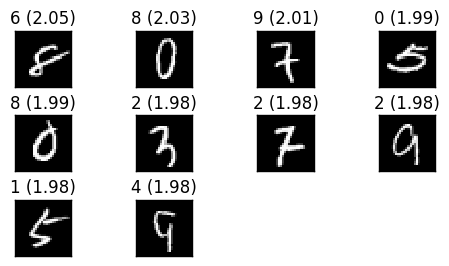

In [7]:
plot_images(e.viz.wrong_uncertain, lambda r: '%d (%.2f)' % (r.pred_class, r.entropy), lambda r: r.proc_image, show=True)

In [8]:
e.learning_curve.head()

,step,seen,train_acc,train_loss,valid_acc,valid_loss
0,0,0,0.100,3.398970,0.100,3.399540
1,25,5000,0.424,2.174830,0.410,2.182580
2,50,10000,0.748,0.822234,0.768,0.762468
3,75,15000,0.864,0.600157,0.816,0.668129


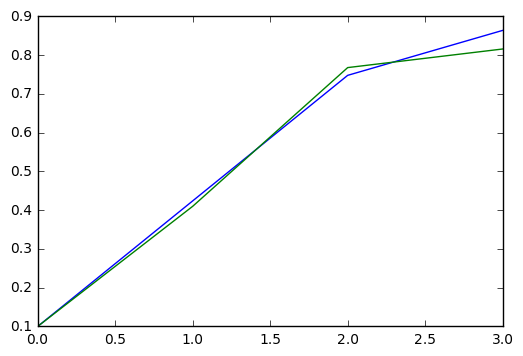

In [9]:
plt.plot(e.learning_curve['train_acc'])
plt.plot(e.learning_curve['valid_acc'])

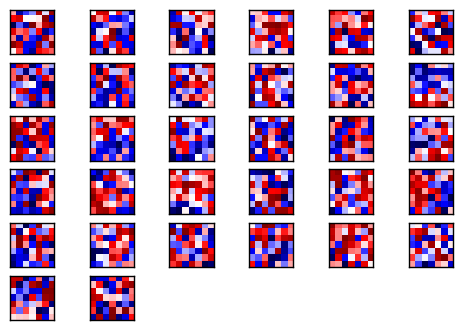

In [10]:
plot_weights(e.conv_weights, 0, show=True)